<a href="https://colab.research.google.com/github/risheeee/Machine_Learning/blob/main/Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy pandas matplotlib seaborn --quiet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
raw_df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Cancer.csv')

In [ ]:
# M - cancerous, B - not cancerous
raw_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
raw_df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
raw_df.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
raw_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
skew_df = raw_df.drop(['diagnosis'], axis = 1)

In [ ]:
skew_list = []
for col in skew_df:
  skew = raw_df[col].skew()
  if skew > 1 or skew < -1:
    skew_list.append(col)
    print(f'{col} has outliers! : {skew}')

compactness_mean has outliers! : 1.1901230311980404
concavity_mean has outliers! : 1.4011797389486722
concave points_mean has outliers! : 1.1711800812336282
fractal_dimension_mean has outliers! : 1.3044888125755076
radius_se has outliers! : 3.0886121663847574
texture_se has outliers! : 1.646443808753053
perimeter_se has outliers! : 3.443615202194899
area_se has outliers! : 5.447186284898394
smoothness_se has outliers! : 2.314450056636759
compactness_se has outliers! : 1.9022207096378565
concavity_se has outliers! : 5.110463049043661
concave points_se has outliers! : 1.4446781446974786
symmetry_se has outliers! : 2.1951328995478216
fractal_dimension_se has outliers! : 3.923968620227413
radius_worst has outliers! : 1.1031152059604372
perimeter_worst has outliers! : 1.1281638713683722
area_worst has outliers! : 1.8593732724433467
compactness_worst has outliers! : 1.4735549003297956
concavity_worst has outliers! : 1.1502368219460262
symmetry_worst has outliers! : 1.433927765189328
fractal_

In [ ]:
q1 = raw_df['area_mean'].quantile(0.25)
q3 = raw_df['area_mean'].quantile(0.75)
iqr = q3 - q1
max_range = q3 + (1.5 * iqr)
min_range = q1 - (1.5 * iqr)
raw_df['area_mean'] = raw_df['area_mean'].clip(lower = min_range, upper = max_range)

In [ ]:
raw_df['area_mean'].describe()

,area_mean
count,569.000000
mean,639.765202
std,305.343508
min,143.500000
25%,420.300000
50%,551.100000
75%,782.700000
max,1326.300000


In [ ]:
skew_list

['compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
for name in skew_list:
  q1 = raw_df[name].quantile(0.25)
  q3 = raw_df[name].quantile(0.75)
  iqr = q3 - q1
  max_range = q3 + (1.5 * iqr)
  min_range = q1 - (1.5 * iqr)
  raw_df[name] = raw_df[name].clip(lower = min_range, upper = max_range)

In [ ]:
skew_list = []
for col in skew_df:
  skew = raw_df[col].skew()
  if skew > 1 or skew < -1:
    skew_list.append(col)
    print(f'{col} has outliers! : {skew}')

concavity_mean has outliers! : 1.0238589790511423
concave points_mean has outliers! : 1.004049090200061
radius_se has outliers! : 1.0250310501368303
perimeter_se has outliers! : 1.0343892092290627
area_se has outliers! : 1.1309400633896982
area_worst has outliers! : 1.0489702906630134


In [ ]:
skew_list

['concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'area_worst']

In [ ]:
for name in skew_list:
  q1 = raw_df[name].quantile(0.25)
  q3 = raw_df[name].quantile(0.75)
  iqr = q3 - q1
  max_range = q3 + (1.5 * iqr)
  min_range = q1 - (1.5 * iqr)
  raw_df[name] = raw_df[name].clip(lower = min_range, upper = max_range)

In [ ]:
skew_list = []
for col in skew_df:
  skew = raw_df[col].skew()
  if skew > 1 or skew < -1:
    skew_list.append(col)
    print(f'{col} has outliers! : {skew}')

concavity_mean has outliers! : 1.0238589790511423
concave points_mean has outliers! : 1.004049090200061
radius_se has outliers! : 1.0250310501368303
perimeter_se has outliers! : 1.0343892092290627
area_se has outliers! : 1.1309400633896982
area_worst has outliers! : 1.0489702906630134


In [ ]:
raw_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,639.765202,0.096360,0.103222,0.086937,0.048552,0.181162,0.062604,...,16.183882,25.677223,106.705369,849.907821,0.132369,0.249883,0.268754,0.114606,0.287616,0.083342
std,3.524049,4.301036,24.298981,305.343508,0.014064,0.049386,0.073900,0.037633,0.027414,0.006418,...,4.587249,6.146258,31.957777,475.645240,0.022832,0.142851,0.197461,0.065732,0.053868,0.015993
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,1326.300000,0.163400,0.228620,0.282410,0.154535,0.304000,0.078750,...,27.460000,49.540000,187.335000,1937.050000,0.222600,0.626950,0.785500,0.291000,0.419150,0.123010


In [ ]:
X = raw_df.drop(['diagnosis'], axis = 1)
y = raw_df['diagnosis']

In [ ]:
y.value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
y = y.map({'B' : 0, 'M' : 1})

In [ ]:
y.value_counts()

,count
diagnosis,
0,357
1,212


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

In [ ]:
X_val, y_val = X_test[:115], y_test[:115]

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((455, 30), (455,), (114, 30), (114,), (114, 30), (114,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)
X_val = pd.DataFrame(X_val, columns = X.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lgr = LogisticRegression(random_state = 27).fit(X_train, y_train)
accuracy_lgr = model_lgr.score(X_train, y_train)
accuracy_lgr

0.978021978021978

In [ ]:
accuracy_lgr = model_lgr.score(X_val, y_val)
accuracy_lgr

0.956140350877193

<Axes: >

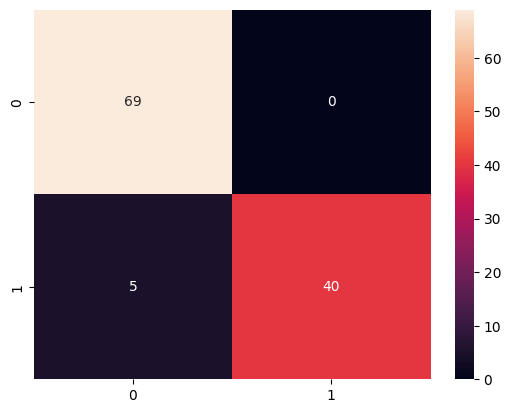

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model_lgr.predict(X_test)
conf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(conf_matrix, annot = True)